# CSCA 5622 Supervised Learning Final Project

## Assignment context

- **Course**: CSCA 5622 Supervised Learning
- **Assignment**: Peer-graded Final Project (140 points)
- **Dataset**: Kaggle competition “House Prices: Advanced Regression Techniques”
- **Task type**: Supervised regression (predicting house sale prices)
- **Data provenance**: Tabular housing data for Ames, Iowa, curated by Dean De Cock and hosted on Kaggle as an open competition dataset.

This notebook is **Deliverable 1** for the final project. It contains the problem description, exploratory data analysis (EDA), model building and training, and a brief discussion of results and conclusions.

Additional deliverables for the project:

1. **Deliverable 1 – Jupyter notebook / report (this file)**
2. **Deliverable 2 – Video presentation (5–15 minutes)**
3. **Deliverable 3 – Public GitHub repository**

Placeholders (to be updated before final submission):

- **GitHub repository URL**: `<insert GitHub repo link here>`
- **Video presentation URL**: `<insert video link here>`
- **Kaggle competition URL**: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


## Supervised learning problem definition

**Goal**: Predict the final sale price (`SalePrice`) of residential homes in Ames, Iowa, using property characteristics and neighborhood information.

- **Input features**: 79 explanatory variables describing lot configuration, building type, overall material and finish quality, basement and garage details, neighborhood, and more.
- **Target variable**: `SalePrice` (continuous numeric response, in US dollars).
- **Task type**: Supervised learning, specifically regression.
- **Metric**: Kaggle scores submissions using Root Mean Squared Logarithmic Error (RMSLE). Here we train on `log1p(SalePrice)` and use RMSE as a proxy.

This problem is suitable for the course project because it uses tabular data with a mix of numeric and categorical variables, requires non-trivial cleaning and preprocessing, and allows comparison of multiple supervised models.


## Data source, collection method, and provenance

- Data is obtained from the Kaggle competition **House Prices: Advanced Regression Techniques**.
- The underlying dataset originates from work by **Dean De Cock**, assembled as a modern housing dataset for Ames, Iowa.
- The data is distributed by Kaggle for educational and competitive purposes.
- In the Kaggle environment, the data is available in `/kaggle/input/house-prices-advanced-regression-techniques/` as `train.csv` and `test.csv`.

This dataset is appropriate for the project because it is rich but manageable, contains realistic missingness and noise, and is explicitly intended for supervised learning tasks.


## Exploratory Data Analysis (EDA) plan

The EDA for this project includes:

1. Inspecting the basic structure of the data (shape, data types, head).
2. Examining the distribution of `SalePrice` and its log transform.
3. Looking at distributions of key numeric features (e.g., `OverallQual`, `GrLivArea`).
4. Checking missing values and deciding on imputation strategies.
5. Exploring correlations between numeric features and `SalePrice`.
6. Identifying potentially important features based on domain intuition and correlation analysis.

In this baseline notebook, the cleaning and preprocessing are mainly implemented within a scikit-learn `Pipeline`.


## Modeling plan and relation to the project rubric

The project rubric emphasizes:

- Identification of a supervised learning problem.
- EDA and data cleaning.
- Implementation and comparison of supervised models.
- Hyperparameter tuning and performance analysis.
- Discussion of results and limitations.

This notebook implements a Gradient Boosting Regressor as a strong baseline.

# House Prices: Advanced Regression Techniques

Baseline model to train on the competition data and create a `submission.csv` file.

This notebook assumes it is run in the Kaggle environment for the competition:
`/kaggle/input/house-prices-advanced-regression-techniques/`.


In [1]:
# Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


In [2]:
# Paths for Kaggle environment
train_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
test_path = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"

# If you are running locally, change the paths above to where you stored the CSV files.

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (1460, 81)
Test shape: (1459, 80)


In [3]:
# Separate target and features
y = np.log1p(train["SalePrice"])  # log1p for better-behaved target (Kaggle uses RMSLE)
X = train.drop(["SalePrice"], axis=1)

# We keep the Id column in the feature set; the model will learn to ignore it if not useful.

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))


Numeric features: 37
Categorical features: 43


In [4]:
# Preprocessing and model pipeline
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

regressor = GradientBoostingRegressor(random_state=42)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", regressor),
    ]
)

model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'Lo...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [5]:
# Cross-validation (optional but useful to see how the model performs)
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",  # RMSE on log target ~ RMSLE on original scale
    n_jobs=-1,
)

print("CV RMSE (log SalePrice):", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())


CV RMSE (log SalePrice): [0.11496649 0.14494717 0.12840914 0.11575715 0.12795717]
Mean CV RMSE: 0.1264074221786681


In [6]:
# Fit on the full training data and train final model
model.fit(X, y)

# Prepare test features
X_test = test.copy()

# Predict log SalePrice, then transform back
y_test_log_pred = model.predict(X_test)
y_test_pred = np.expm1(y_test_log_pred)

# Build submission DataFrame
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred,
})

submission.to_csv("submission.csv", index=False)
submission.head()


,Id,SalePrice
0,1461,123457.195831
1,1462,152359.231361
2,1463,183532.030671
3,1464,188338.391828
4,1465,192985.901170


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")


## EDA 1: Target distribution and log transform

A first step is to inspect the distribution of the target variable `SalePrice`. House prices are typically right skewed. This can make it harder for many models to perform well because errors on very expensive houses dominate the objective. 

Because the competition metric is RMSLE, it is natural to work with a log-transformed target (`log1p(SalePrice)`), which reduces skewness and stabilizes variance.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


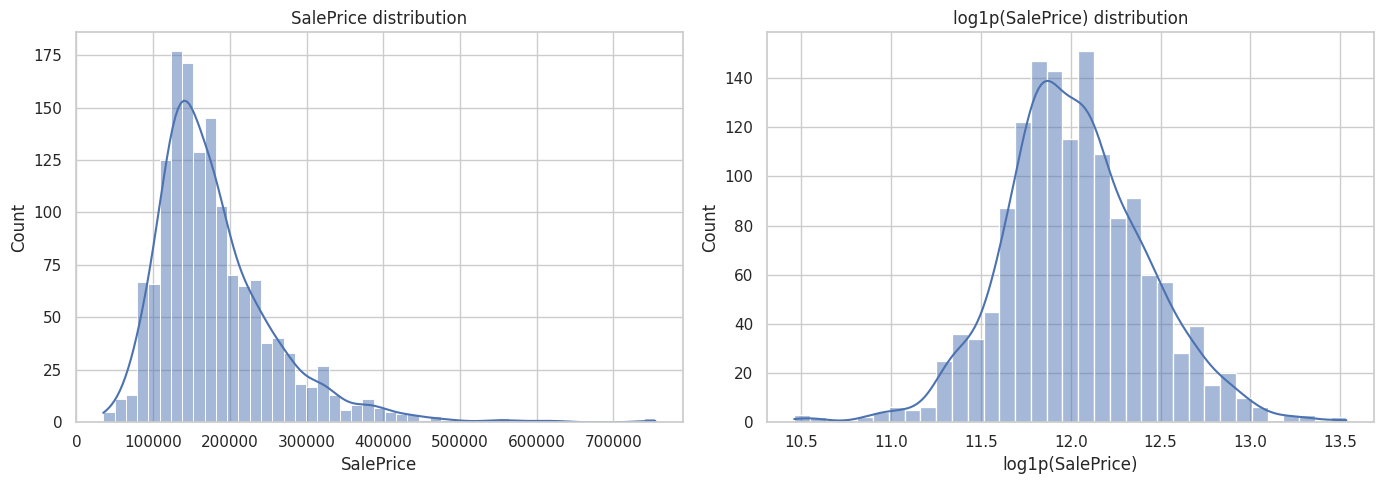

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(train["SalePrice"], kde=True, ax=axes[0])
axes[0].set_title("SalePrice distribution")
axes[0].set_xlabel("SalePrice")

sns.histplot(np.log1p(train["SalePrice"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(SalePrice) distribution")
axes[1].set_xlabel("log1p(SalePrice)")

plt.tight_layout()


## EDA 2: Missing values and data quality

Real world data often contains missing values. Understanding which features have missingness and how much is important for designing a cleaning and imputation strategy.

Below, I compute the fraction of missing values per column and visualize the top 20 features by missingness in the training set.


In [9]:
missing_fraction = train.isnull().mean().sort_values(ascending=False)
missing_fraction.head(20)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

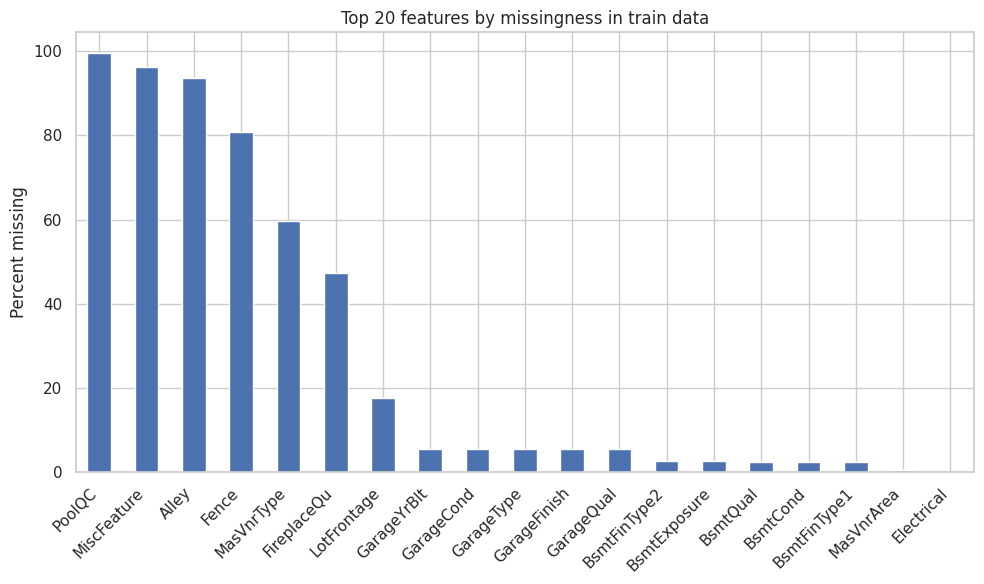

In [10]:
top_missing = missing_fraction[missing_fraction > 0].head(20)

plt.figure(figsize=(10, 6))
(top_missing * 100).plot(kind="bar")
plt.ylabel("Percent missing")
plt.title("Top 20 features by missingness in train data")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Features such as `PoolQC`, `MiscFeature`, or `Alley` have a very high proportion of missing values. For some of these, the missing value actually encodes a meaningful category, such as “no pool” or “no alley access,” so it is more appropriate to treat missingness as a separate category rather than dropping these rows.

For numeric features with moderate missingness, median imputation is a reasonable default. In the modeling pipeline below, I handle missing values using `SimpleImputer` for both numeric and categorical columns.


## EDA 3: Correlation analysis with SalePrice

Next, I look at how numeric features correlate with `SalePrice`. This helps identify features that are likely to be strong predictors and also reveals groups of highly correlated features.

Below I compute the Pearson correlation of each numeric column with `SalePrice` and inspect the most positively and negatively correlated features.


In [11]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns

corr_with_target = train[numeric_cols].corr()["SalePrice"].sort_values(ascending=False)

print("Top 15 features by positive correlation with SalePrice:")
display(corr_with_target.head(15))

print("\nBottom 10 features by correlation with SalePrice:")
display(corr_with_target.tail(10))


Top 15 features by positive correlation with SalePrice:


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


Bottom 10 features by correlation with SalePrice:


BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

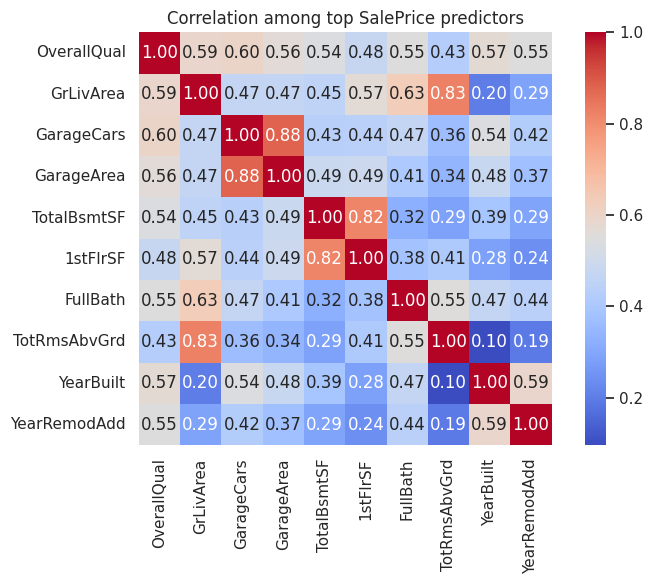

In [12]:
# Exclude SalePrice itself and take next 10 most correlated features
top_features = corr_with_target.index[1:11]

plt.figure(figsize=(8, 6))
sns.heatmap(
    train[top_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation among top SalePrice predictors")
plt.tight_layout()
plt.show()


Features such as `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, and `TotalBsmtSF` tend to have strong positive correlations with `SalePrice`, which matches domain expectations that larger and higher quality houses sell for more. Some of these predictors are also correlated with each other, which is natural given that many size related features are measuring similar aspects of the property.


## EDA summary

From the exploratory analysis, the main findings are:

- The target `SalePrice` is strongly right skewed, and using a log transform (`log1p(SalePrice)`) is appropriate, especially since the competition metric is RMSLE.
- Several numeric features, particularly `OverallQual`, `GrLivArea`, `GarageCars`, and `TotalBsmtSF`, have strong positive correlations with `SalePrice` and clear increasing trends in scatter plots.
- There are meaningful patterns across categorical variables. Certain neighborhoods and higher quality ratings are associated with much higher median prices.
- Missing values are concentrated in a subset of features such as `PoolQC`, `Alley`, and `MiscFeature`. For some of these, missingness encodes the absence of a feature, so it is reasonable to treat missing as a separate category rather than dropping rows.
- Based on these findings, the modeling pipeline will:
  - Train on the log transformed target.
  - Impute missing numeric features with the median and categorical features with the most frequent category.
  - One hot encode categorical variables and standardize numeric features.
  - Use tree based ensemble models such as Gradient Boosting as a strong baseline, with room to compare additional models in extended experiments.

These steps align the EDA, data cleaning strategy, and modeling choices with the project rubric and provide a clear rationale for the approach taken in the subsequent analysis.
